In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
def viewImage(image):
    window_name = 'image'
    cv2.imshow(window_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
white = np.uint8([[[0, 0, 0 ]]])
white_hsv = cv2.cvtColor(white,cv2.COLOR_BGR2HSV)
print( white_hsv)


[[[0 0 0]]]


In [61]:

Val = "200"
Mat = "Glyc"
Add = "alc"
Per = "2"
Att = "3"
Tem = "23"

name = Val+ "_" + Mat + "_" + Add + "_" +Per + "_" + Att +"_" + Tem
print(name)
image = cv2.imread(name + ".png")
w, h, c = image.shape

print(w)
print(h)
# image  = cv2.resize(image, (h*7, w*7))
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

viewImage(hsv_img) 



200_Glyc_alc_2_3_23
106
256


In [57]:
white_low = np.array([0 , 0, 0] )

white_high = np.array([1, 1, 1])

curr_mask = cv2.inRange(hsv_img, white_low, white_high)
hsv_img[curr_mask > 0] = ([0,0,0])
viewImage(hsv_img) ## 2

       x   y
0    130  41
1    129  42
2    128  42
3    127  42
4    126  42
..   ...  ..
413  135  41
414  134  41
415  133  41
416  132  41
417  131  41

[418 rows x 2 columns]


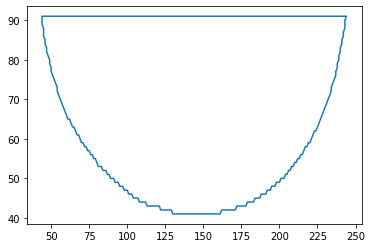

In [62]:
# converting the HSV image to Gray inorder to be able to apply 
# contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# image2 = image
# cv2.drawContours(image2, contours, -1, (0, 0, 255), 1)
# viewImage(image2) ## 5



cont = []
for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.002*cnt_len, True)
                cont.append(cnt)
image_app = image


a = []
for i in contours:
    a.append(len(i))
ind = (a.index(max(a)))

cv2.drawContours(image_app, contours, ind, (0, 0, 255), 2)
viewImage(image_app)

x =  contours[ind][:, 0][:, 0]
y = ( contours[ind][:, 0][:, 1])
df = pd.DataFrame()
df['x'] = x
df['y'] = y
print(df)

path = "C:/Users/gorar/Desktop/mipt/lab_term/drops/git_drops/"

df.to_csv(path + name+".csv")
plt.plot(x, y)

In [10]:
cv2.imwrite('drop.png', image_app)


True

In [8]:
print(1/60/np.sqrt(c))

0.009622504486493762
